## How GANs Work?:

GANs stands for generative adversial networks, it's is generative neurals networks model that constract on two components the $generator$ and the $descriminator$, the $generator$ take a random noise as an input(eg, gaussian) and try to produce output that similar to the data that we want to generalize it(it's play the same role of $decoder$ in the context of $autoencoder$),
the $descriminator$ feeded first by the real data, and his role is to clssifiy the output of $generator$ as $real$ or $fake$
data and guide the $generator$ to produce more convincing output, actually the $generator$ doesn't never see the data, but it try to trick and fool the $descriminator$.
the following image describe how actually  GANs work?

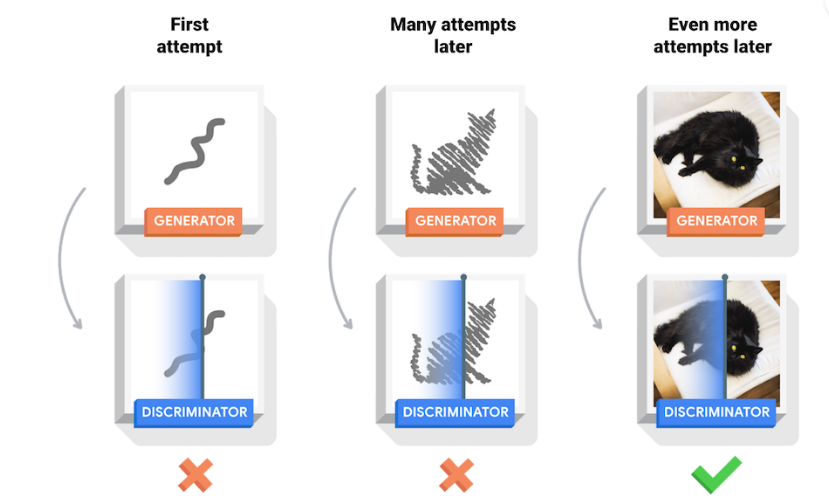

in the mathematic and algorithm's  view the GANs works as following:

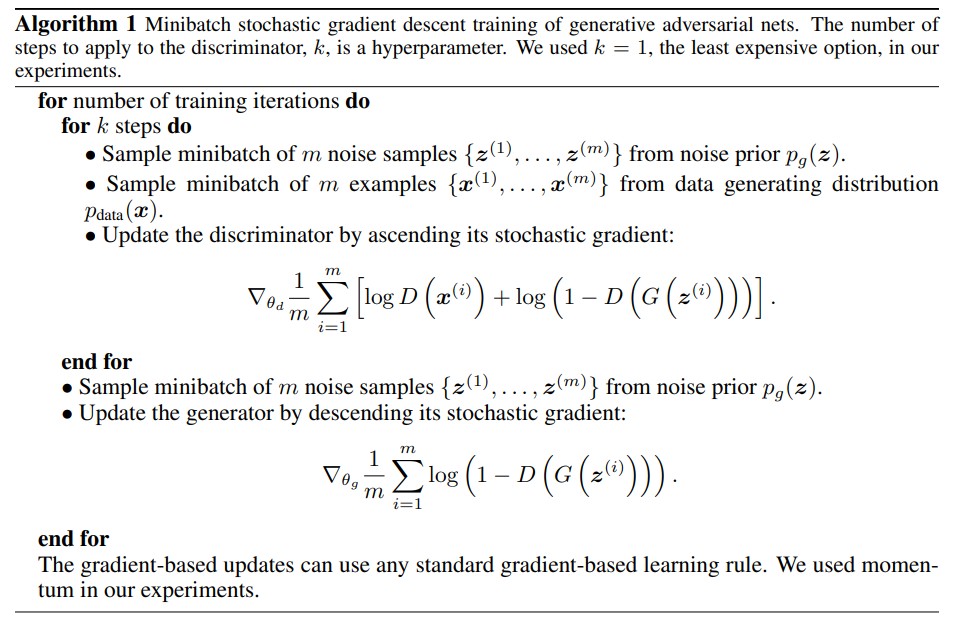

these above algorithm is snipped from the paper of GANs(2014).

## My Understaning of The Ppaer:

$D(x^{i})$ is the ouput of the $descriminator$, so it's the probability of data point $x^{i}$ is generated from the real data.

$G(z^{i})$ is the ouput of the $generator$.

$D(G(z^{i}))$ is the ouput of the $descriminator$, so it's the probability  $z^{i}$ is generated from the generator $G$.

we train the $descriminator$ to maximize the probability that the $sample$ is real(i.e$ max D(x^{i})$ for all $i$) and minimize 

the probability $sample$ is generated from the $generator$ (i.e  $min D(G(z^{i}))  for all $i$).

we have for all ${i}$:

$max {D(x^{i})}$ $~~~~$& $~~~~$ $min D(G(z^{i}))$ $~~~$ $\Leftrightarrow$ $~~~$ $max D(x^{i})$  $~~~$ & $~~~$ $max -D(G(z^{i}))$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $max D(x^{i})$  $~~~$ & $~~~$ $max$ $~$$1-D(G(z^{i}))$ 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $max \ln D(x^{i})$  $~~~$ & $~~~$ $max$ $~$$ \ln (1-D(G(z^{i})))$ 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $max [\ln D(x^{i})+\ln (1-D(G(z^{i})))]$ 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $ \displaystyle\frac{1}{m}max \sum_{i=1}^{m}[\ln D(x^{i})+\ln (1-D(G(z^{i})))]$ $~~~~~$(we sum over oll data points)

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $ -\displaystyle\frac{1}{m}min \sum_{i=1}^{m}[\ln D(x^{i})+\ln (1-D(G(z^{i})))]$

so the the $loss$ of $descriminator$ is giveen by:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $d_{-}loss=-\displaystyle\frac{1}{m} \sum_{i=1}^{m}[\ln D(x^{i})+\ln (1-D(G(z^{i})))]$

that we wan to minimize it.

that lead us to definition of the $binarycrossentropy$, so we can use the function $tensorflow.keras.losses.BinaryCrossentropy$ for implementing the $d_{-}loss$ and $tensorflow.GradientTape$ for optimization and $tensorflow.keras.optimizers.Adam$ as optimizer.

in other hand we want the $generator$ to produce more accurate outputs, in other word we want to maximize the probability of data that actually is generated by generator ($fake$ data) is taken from real data(we want to fool the descriminator)
so we want to maximize $D(G(z^{i}))$ for all $i$.

$ max D(G(z^{i}))$ $~~$ $~~~$ $\Leftrightarrow$ $~~~$ $ min$ $~$ $-D(G(z^{i}))$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $ min$ $~$ $1-D(G(z^{i}))$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~~~$ $\Leftrightarrow$ $~~~$ $ min$ $~$ $\displaystyle\dfrac{1}{m}\sum_{i=1}^{m}\ln [1-D(G(z^{i}))]$  $~~~~~$(we sum over oll data points)

so the the $loss$ of $generatorr$ is giveen by:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $g_{-}loss=\displaystyle\dfrac{1}{m}\sum_{i=1}^{m}\ln [1-D(G(z^{i}))]$  $~~~~~$

that we wan to minimize it.
as you can relize, there a kind of confrontation between the training of the $generator$ and the $descrimiator$ due minimizing of $d_{-}loss$ can lead to explosion of $g_{-}loss$ and vice-versa, so there indeed we need perform a tarde-off between them.

great, as we say earlier,  we feed firstly the $descriminator$ by the real data, a label them by ones ($D(x^{i})=1$) through the $numpy.ones$ function.


## Defining the generator: